<a href="https://colab.research.google.com/github/psychozik/IAR_Chub/blob/main/%D0%98%D0%90%D0%A0_%D0%A7%D1%83%D0%B1%D1%8B%D0%BA%D0%B8%D0%BD_%D0%95%D0%B3%D0%BE%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказание успеваемости студентов на основе их социального статуса и отношения к учебному процессу.

Чубыкин Егор Романович

# Описание проблемы

У разных стундетов в силу их социально статуса и отношения к учебе могут быть разные оценки. Предлагается провести анализ и визуализировать - влияет ли отношение к учебе и социальных статус на успеваемость. Также будет произведенно предсказание и погрешность предсказания будущих оценок студентов.

# Описание данных
Датасет состоит из 1000 записей об успеваемости и других данных учеников. 

Столбцы:
- gender - пол студента
- race/ethnicity - расовая/этническая принадлежность студента 
- parental level of education	 - уровень образования родителей студента
- lunch - обед студента
- math score - оценка студента по математике
- reading score - оценка студента на скорость чтения
- writing score - оцента студена на скорость написания


Ссылка на исходный csv-файл - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams 

# Предобработка данных для визуализации

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/new1/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape
#Кол-во студентов = 1000 человек

(1000, 8)

In [ ]:
#Узнаём средние значение с помощью элемента mean
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Получаем средние значение  для каждого человека на основе оценок по математике, скорости чтения и скорости написания
df["AVG score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
df.head(30)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,AVG score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0
5,female,group B,associate's degree,standard,none,71,83,78,77.0
6,female,group B,some college,standard,completed,88,95,92,92.0
7,male,group B,some college,free/reduced,none,40,43,39,41.0
8,male,group D,high school,free/reduced,completed,64,64,67,65.0
9,female,group B,high school,free/reduced,none,38,60,50,49.0


In [ ]:
# Узнаём, сколько в датафрейме Мужчин и Женщин
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
# Удаляем все текстовые записи и заменям их цифрами
scalerlb = LabelEncoder()
df['gender'] = scalerlb.fit_transform(df['gender'])
df['race/ethnicity'] = scalerlb.fit_transform(df['race/ethnicity'])
df['parental level of education'] = scalerlb.fit_transform(df['parental level of education'])
df['lunch'] = scalerlb.fit_transform(df['lunch'])
df['test preparation course'] = scalerlb.fit_transform(df['test preparation course'])
df.head(30)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,AVG score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0
5,0,1,0,1,1,71,83,78,77.0
6,0,1,4,1,0,88,95,92,92.0
7,1,1,4,0,1,40,43,39,41.0
8,1,3,2,0,0,64,64,67,65.0
9,0,1,2,0,1,38,60,50,49.0


<Axes: xlabel='gender', ylabel='count'>

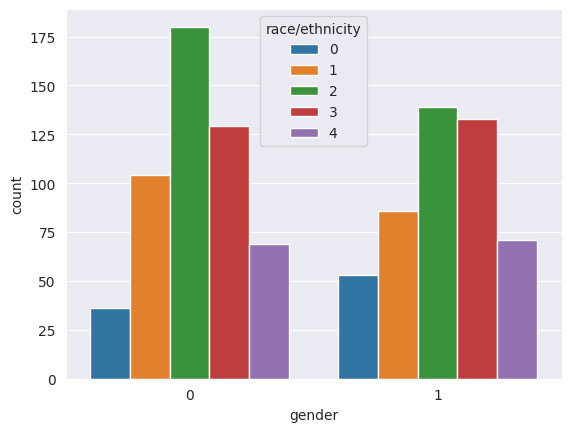

In [ ]:
#Расово-Этнический Анализ
sns.countplot(data = df, x = 'gender', hue = 'race/ethnicity')
# Пол :
#0 - Женщина
#1 - Мужчина
# Расовая/этническая принадлежность студента :
#0 - group A
#1 - group B	
#2 - group C
#3 - group D
#4 - group E

В группе больше всего женщин, преимущественно из группы С (group C)

# Анализ по "test preparation course" (курс подготовки к тестированию)

In [ ]:
df['test preparation course'].value_counts()
#0 = Completed (курс завершен)
#1 = None (курс не завершен)

1    642
0    358
Name: test preparation course, dtype: int64

Данные показывают, что 642 человека из 1000 человек не выполнили 
курс подготовки.

---



# Создаём Круговую диаграмму для отображения переменной "test preparation course".

([<matplotlib.patches.Wedge at 0x7fcef8d10880>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'Курс не завершен'),
  Text(0.4746018041084478, -0.9923472817199666, 'Курс завершен')])

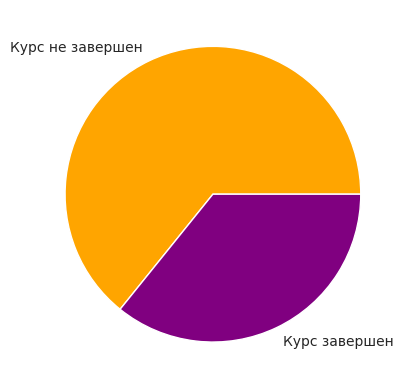

In [ ]:
labels = ['Курс не завершен', 'Курс завершен']
color = ['orange', 'purple']
plt.pie(df['test preparation course'].value_counts() , labels = labels, colors = color)

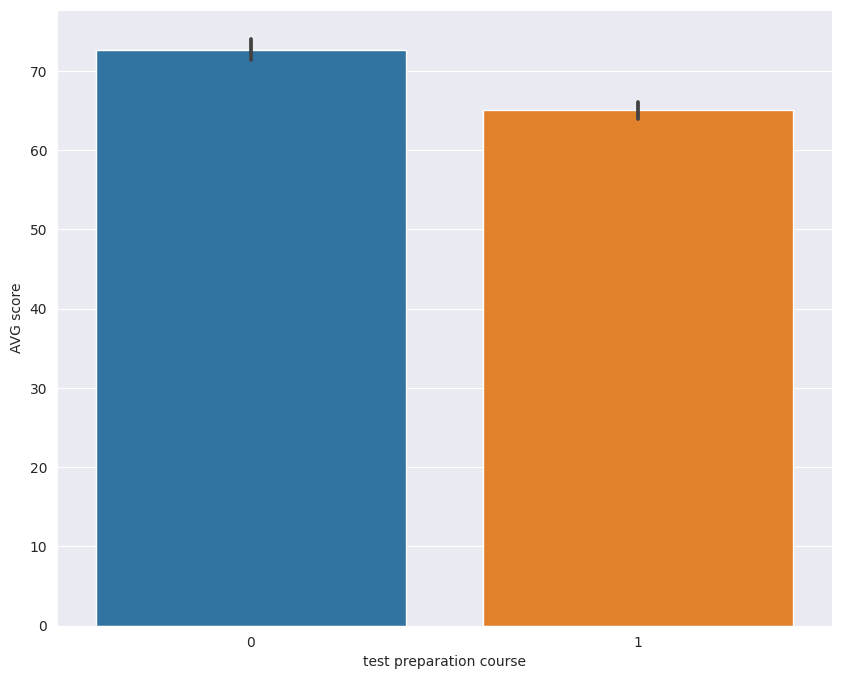

In [ ]:
# Создаёи график, который покажет, какие оценки имеют студенты завершившие курс и не завершившие его
plt.figure(figsize = (10,8))
sns.barplot(x = 'test preparation course', y = 'AVG score', data = df)
plt.show()

Данные с графика показывают, что студенты завершившие курс имеют хорошие оценки, а студент не завершившие его имеют оценки немного хуже.

---



# Анализ "lunch" (обед)

<Axes: xlabel='lunch', ylabel='AVG score'>

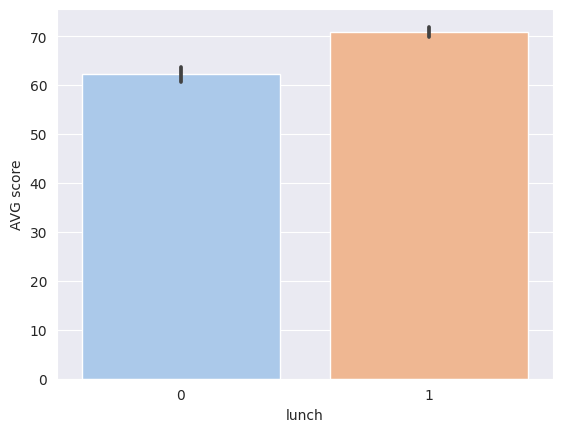

In [ ]:
sns.barplot(x = df['lunch'], y = df['AVG score'], palette = 'pastel')
#0 = free/reduced (льготные обед/уменьшенный)
#1 = standard

Студенты, получающие стандартный обед, лучше справляются с экзаменами, чем студенты, получающие бесплатный / льготный обед

---



# Анализ уровня образования родителей

<Axes: xlabel='parental level of education', ylabel='AVG score'>

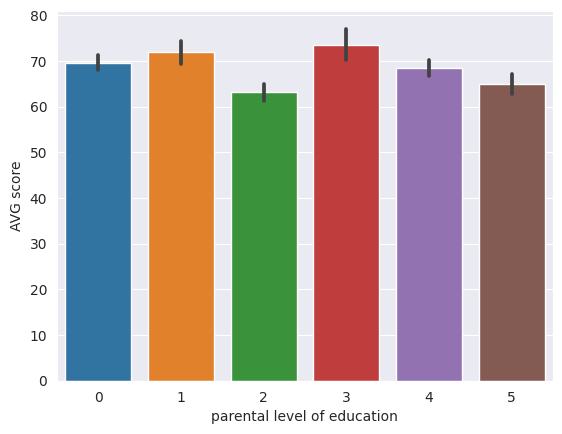

In [ ]:
sns.barplot(x = 'parental level of education', y = 'AVG score', data = df)
#0 = associate's degree	(степень младшего специалиста)
#1 = bachelor's degree (степень бакалавра)
#2 = high school (средняя школа)
#3 = master's degree (степень магистра)
#4 = some college	(колледж)
#5 = some high school (средняя школа №2)

2-ая категория образования родителей студентов относится к средней школе, а 3-я - к магистратуре, поэтому образование родителей прямо пропорционально оценкам студентов.



<Figure size 1000x500 with 0 Axes>

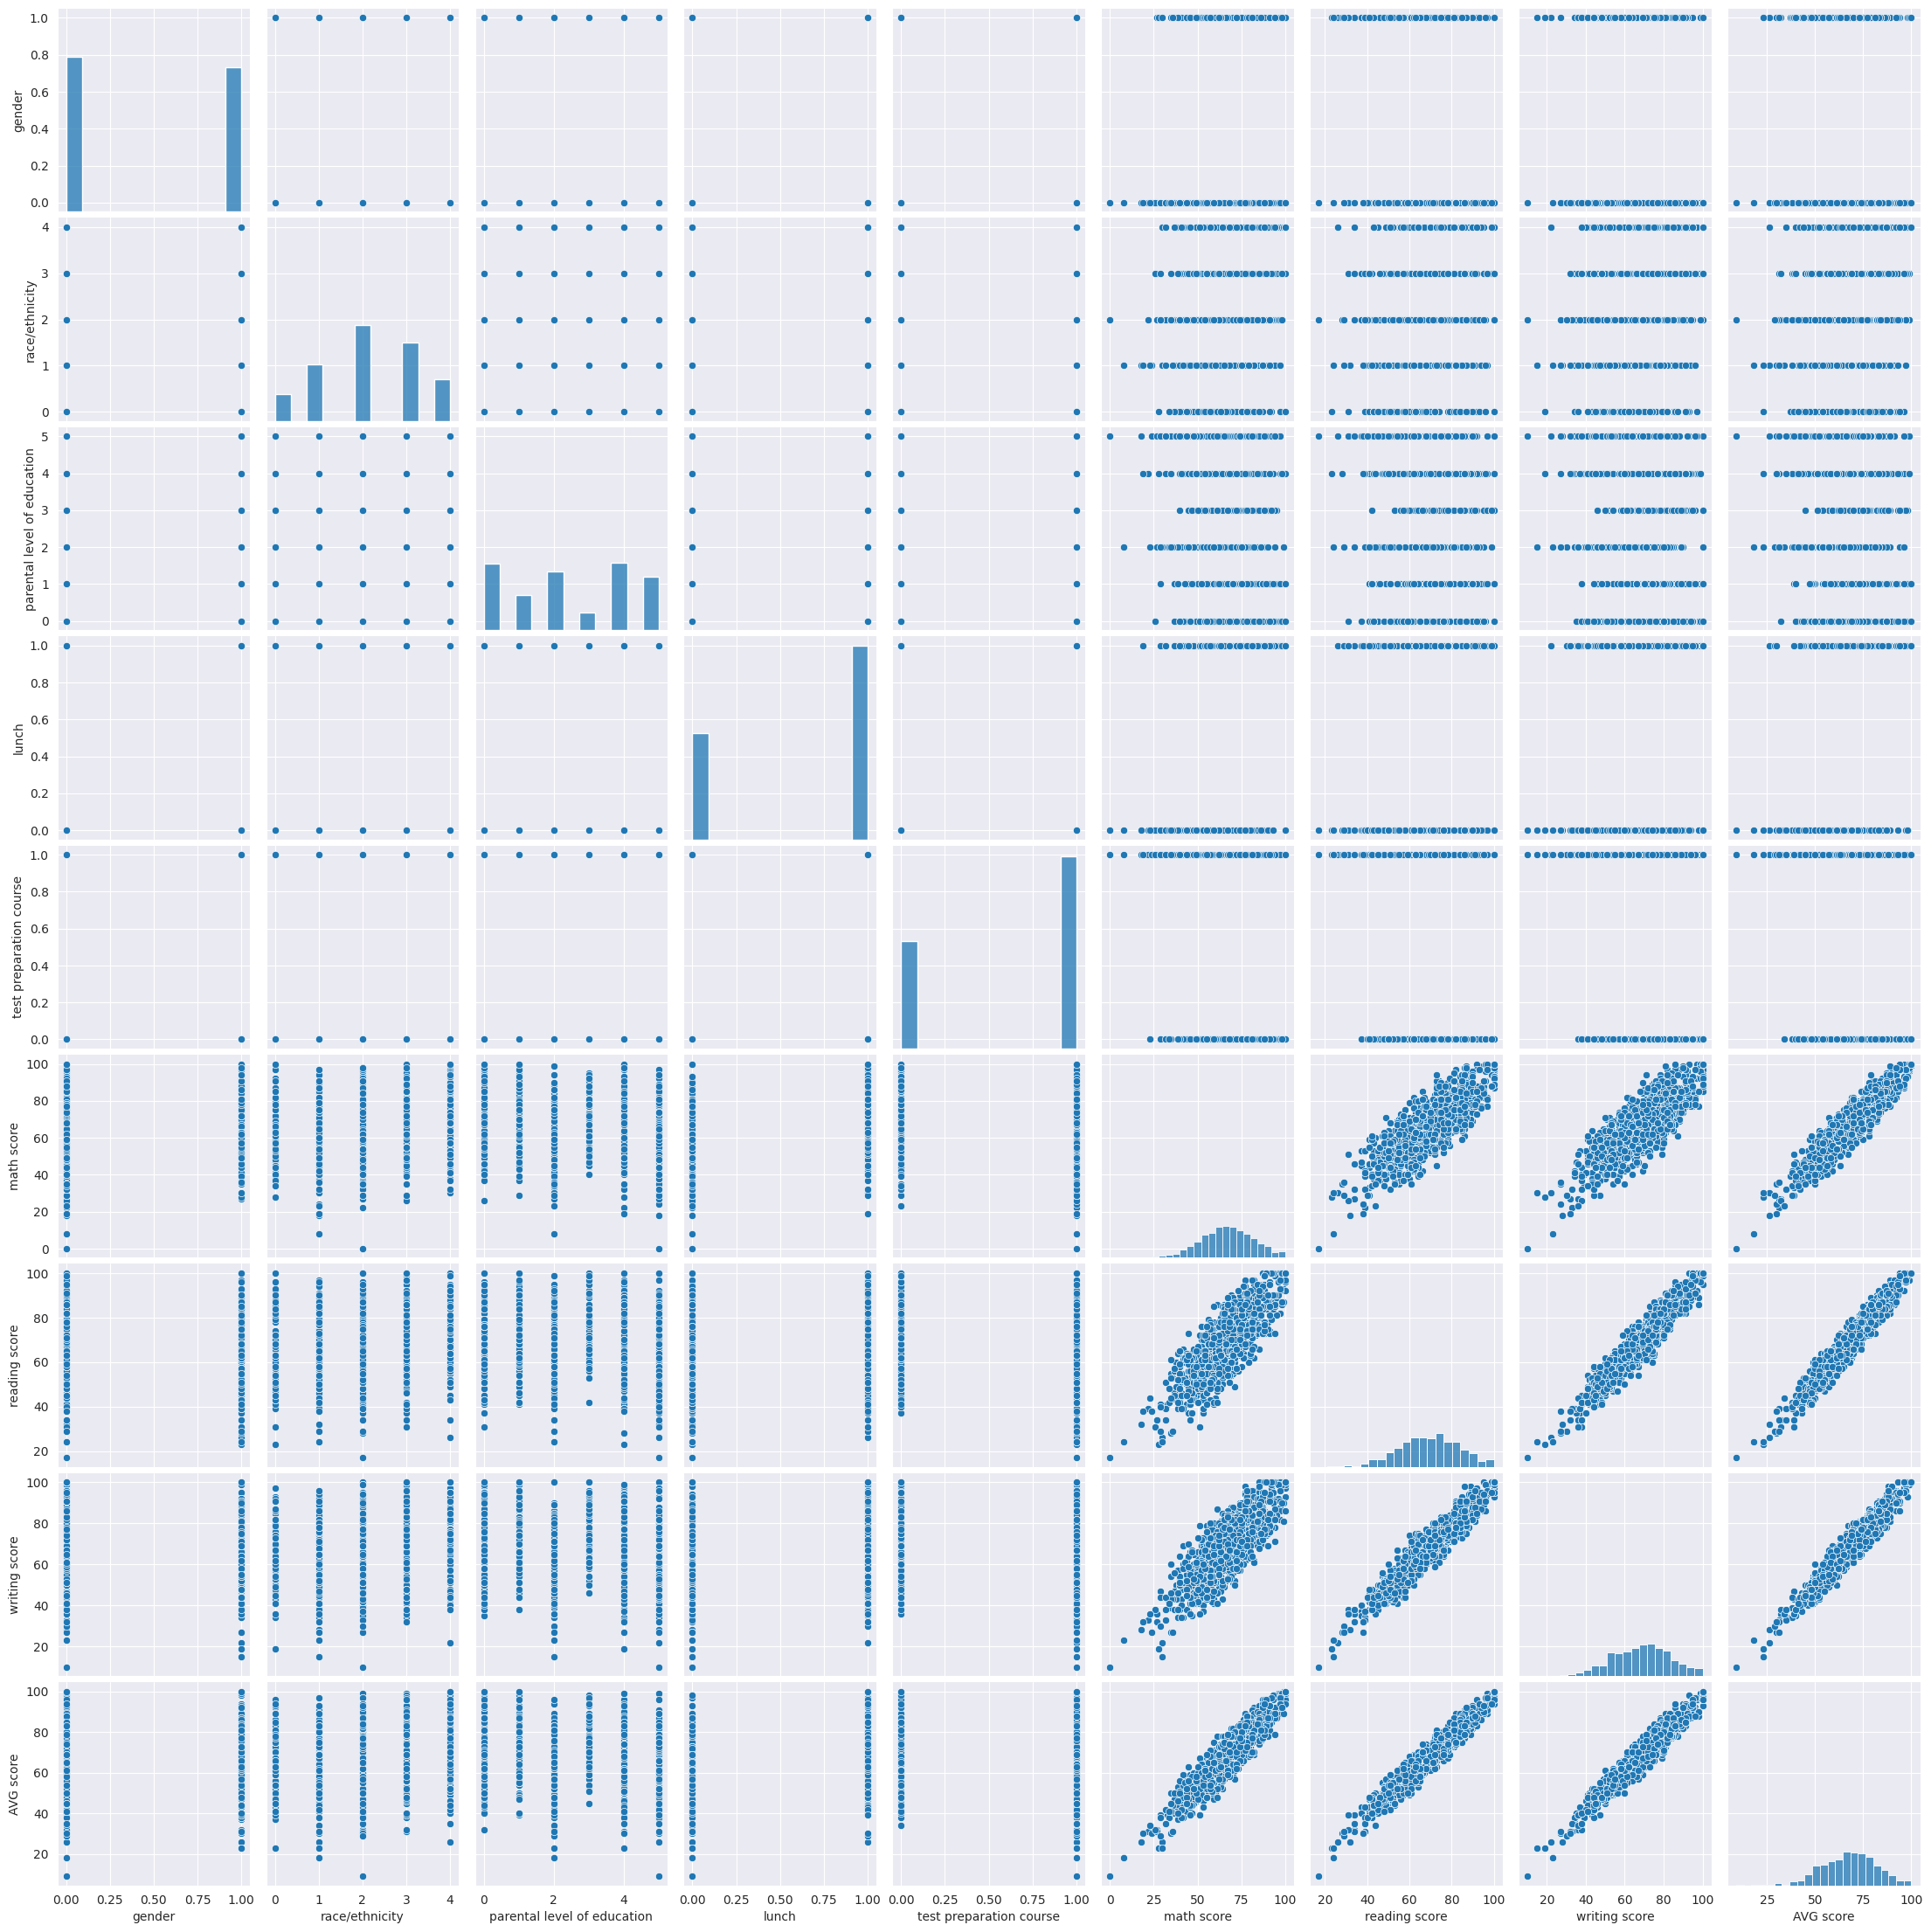

In [ ]:
plt.figure(figsize = (10,5))
sns.pairplot(df)
plt.show()

# Тепловая карта
С помощью тепловой карты

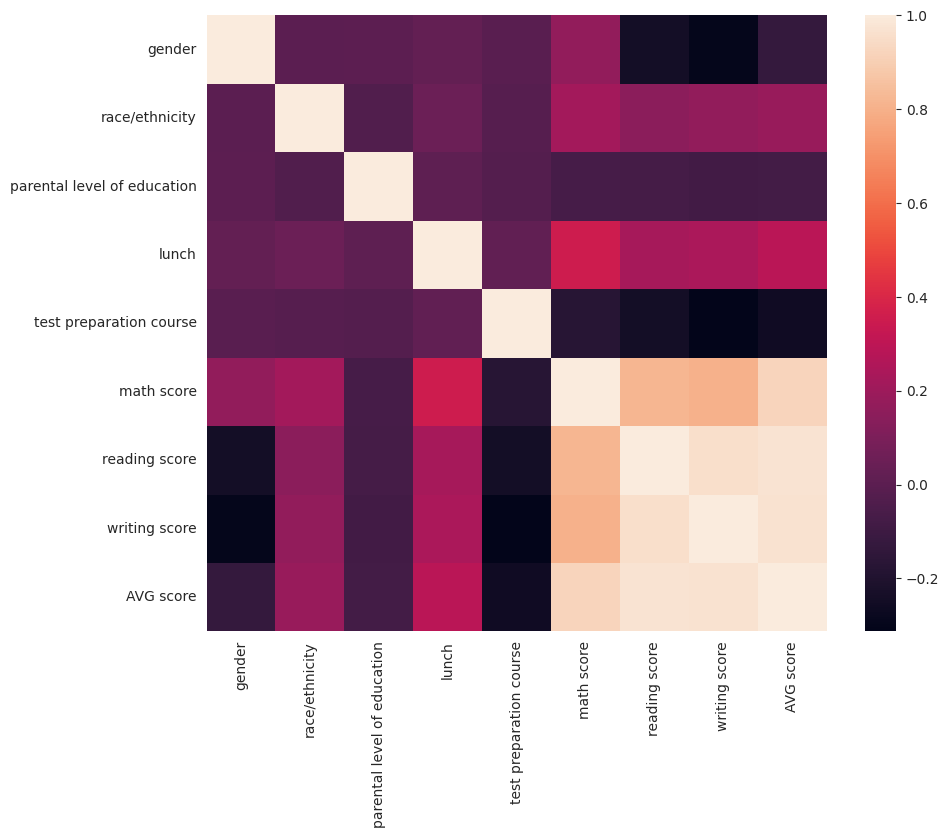

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr())
plt.show()



---



# Предварительная обработка данных для моделирования и оценки модели с помощью "confusion_matrix"

Произведём 3 моделирования с разным количеством циклов обучения (эпох).

In [ ]:
df = df.drop(['math score', 'writing score', 'reading score'],axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,AVG score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


# Моделирование №1

In [ ]:
# Тренировка модели для предсказания оценок
from sklearn.model_selection import train_test_split
y1 = df['AVG score']
x1 = df.drop(['AVG score'], axis  = 1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size = 0.5, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model1 = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model1.fit(x_train1, y_train1)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
predictions1 = model1.predict(x_test1)

In [ ]:
# предсказанные оценки студентов
predictions1

array([80., 56., 56., 59., 65., 76., 68., 80., 79., 68., 65., 54., 68.,
       80., 76., 65., 68., 76., 65., 68., 65., 54., 67., 68., 56., 56.,
       68., 68., 65., 76., 65., 76., 67., 65., 76., 80., 79., 68., 75.,
       79., 68., 59., 49., 87., 65., 75., 65., 65., 76., 52., 80., 56.,
       65., 68., 56., 80., 54., 68., 76., 54., 56., 79., 76., 80., 76.,
       73., 68., 65., 76., 61., 80., 56., 80., 68., 80., 80., 68., 68.,
       68., 65., 76., 79., 79., 76., 79., 79., 56., 75., 76., 52., 54.,
       65., 54., 55., 79., 68., 59., 54., 56., 68., 76., 80., 61., 75.,
       80., 75., 76., 65., 79., 79., 76., 87., 54., 59., 79., 79., 76.,
       59., 56., 76., 54., 65., 76., 68., 56., 76., 68., 76., 76., 79.,
       79., 68., 59., 68., 76., 80., 79., 56., 68., 68., 79., 68., 68.,
       68., 65., 59., 65., 59., 76., 79., 68., 65., 79., 56., 76., 77.,
       56., 65., 68., 49., 65., 68., 59., 80., 76., 65., 75., 68., 79.,
       68., 68., 87., 65., 75., 65., 79., 56., 65., 87., 68., 68

In [ ]:
difference1 = abs(predictions1 - y_test1)

In [ ]:
y_test1

993    69.0
859    77.0
298    45.0
553    68.0
672    74.0
       ... 
647    65.0
190    67.0
361    82.0
664    69.0
375    43.0
Name: AVG score, Length: 500, dtype: float64

In [ ]:
difference1.mean()

11.392

Средняя погрешность в оценках составляет 11.392 балла

---



# Моделирование №3

In [ ]:
y2 = df['AVG score']
x2 = df.drop(['AVG score'], axis  = 1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size = 0.7, random_state = 0)

In [ ]:
model2 = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model2.fit(x_train2, y_train2)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
predictions2 = model2.predict(x_test2)

In [ ]:
# предсказанные оценки студентов №2
predictions2

array([ 64.,  55.,  68.,  55.,  65.,  73.,  79.,  59.,  68.,  68.,  65.,
        46.,  68.,  59.,  73.,  64.,  68.,  76.,  65.,  94.,  65.,  80.,
        66.,  59.,  55.,  55.,  45.,  68.,  64.,  76.,  65.,  68.,  45.,
        65.,  75.,  59.,  72.,  68.,  75.,  72.,  68.,  55.,  61.,  75.,
        64.,  75.,  65.,  64.,  72.,  64.,  59.,  55.,  73.,  68.,  75.,
        64.,  80.,  59.,  73.,  80.,  55.,  72.,  73.,  59.,  61.,  73.,
        68.,  65.,  76.,  61.,  80.,  80.,  68.,  76.,  80.,  80.,  68.,
        68.,  72.,  65.,  68.,  79.,  79.,  61.,  75.,  79.,  55.,  66.,
        73.,  64.,  46.,  65.,  46.,  55.,  68.,  68.,  55.,  46.,  55.,
        68.,  76.,  80.,  61.,  65.,  59.,  65.,  73.,  64.,  72.,  68.,
        72.,  75.,  80.,  55.,  72.,  72.,  73.,  55.,  81.,  76.,  80.,
        64.,  76.,  68.,  75.,  73.,  68.,  73.,  73.,  72.,  68.,  68.,
        55.,  68.,  76.,  79.,  68.,  68.,  79.,  68.,  68.,  72.,  68.,
        68.,  73.,  55.,  65.,  55.,  73.,  68.,  6

In [ ]:
difference2 = abs(predictions2 - y_test2)

In [ ]:
y_test2

993    69.0
859    77.0
298    45.0
553    68.0
672    74.0
       ... 
509    88.0
340    57.0
221    82.0
928    44.0
146    82.0
Name: AVG score, Length: 700, dtype: float64

In [ ]:
difference2.mean()

11.76

Средняя погрешность в оценках составляет 11.76 балла

---


In [ ]:
y3 = df['AVG score']
x3 = df.drop(['AVG score'], axis  = 1)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3,test_size = 100, random_state = 0)

In [ ]:
model3 = LogisticRegression(solver='newton-cg', random_state=0)

In [ ]:
model3.fit(x_train3, y_train3)

LogisticRegression(random_state=0, solver='newton-cg')

In [ ]:
predictions3 = model3.predict(x_test3)

In [ ]:
# предсказанные оценки студентов №3
predictions3

array([69., 56., 69., 58., 73., 82., 67., 71., 79., 68., 73., 56., 66.,
       71., 65., 56., 68., 74., 73., 68., 73., 69., 67., 68., 56., 56.,
       55., 68., 56., 74., 59., 68., 67., 67., 75., 71., 73., 66., 75.,
       72., 68., 56., 68., 75., 65., 75., 73., 59., 74., 56., 71., 55.,
       59., 68., 69., 69., 69., 68., 76., 69., 56., 74., 76., 71., 68.,
       58., 68., 73., 76., 68., 71., 56., 71., 75., 71., 71., 68., 68.,
       73., 73., 68., 69., 87., 68., 66., 69., 56., 75., 76., 56., 56.,
       67., 56., 55., 79., 68., 59., 56., 56., 68.])

In [ ]:
difference3 = abs(predictions3 - y_test3)

In [ ]:
y_test3

993    69.0
859    77.0
298    45.0
553    68.0
672    74.0
       ... 
485    72.0
568    53.0
108    66.0
367    63.0
644    65.0
Name: AVG score, Length: 100, dtype: float64

In [ ]:
difference3.mean()

10.82

Средняя погрешность в оценках составляет 10.82 балла

---


